# 10 モデルの検証方法とチューニング方法

教師あり学習によって構築されるモデルは、未知のデータに適用したときに、モデル構築者の期待する性能を発揮することが重要です。10章では、この未知データに対するモデル性能（汎化性能）を評価するためのモデルの検証方法を学びます。さらに、そもそものモデルの汎化性能を向上させるためのアプローチについても学びます。

ゴール：モデル構築時の注意点や評価方法を学び、評価指標を計算することができる。複数のモデルを組み合わせるアンサンブル学習を理解し、代表的手法を使えるようになる。

- **[10.1 モデルの評価と精度を上げる方法とは](#10.1-モデルの評価と精度を上げる方法とは)** 
    - [10.1.1 機械学習の課題とアプローチ](#10.1.1-機械学習の課題とアプローチ)
    - [10.1.2 この章で使うライブラリのインポート](#10.1.2-この章で使うライブラリのインポート)
<br><br> 
- **[10.2 モデルの評価とパフォーマンスチューニング](#10.2-モデルの評価とパフォーマンスチューニング)**   
    - [10.2.1 ホールドアウト法と交差検証法](#10.2.1-ホールドアウト法と交差検証法)
    - [10.2.2 パフォーマンスチューニング：ハイパーパラメータチューニング](#10.2.2-パフォーマンスチューニング：ハイパーパラメータチューニング)
    - [10.2.3 パフォーマンスチューニング：特徴量の扱い](#10.2.3-パフォーマンスチューニング：特徴量の扱い)
    - [10.2.4 モデルの種類](#10.2.4-モデルの種類)
<br><br> 
- **[10.3 モデルの評価指標](#10.3-モデルの評価指標)** 
    - [10.3.1 分類モデルの評価：混同行列と関連指標](#10.3.1-分類モデルの評価：混同行列と関連指標)
    - [10.3.2 分類モデルの評価：ROC曲線とAUC](#10.3.2-分類モデルの評価：ROC曲線とAUC)
    - [10.3.3 回帰モデルの評価指標](#10.3.3-回帰モデルの評価指標)
<br><br>
- **[10.4 アンサンブル学習](#10.4-アンサンブル学習)**
    - [10.4.1 バギング](#10.4.1-バギング)
    - [10.4.2 ブースティング](#10.4.2-ブースティング)
    - [10.4.3 ランダムフォレスト、勾配ブースティング](#10.4.3-ランダムフォレスト、勾配ブースティング)
<br><br>
- **[10.5 総合問題](#10.5-総合問題)**
    - [■総合問題10-1 教師あり学習の用語（2）](#■総合問題10-1-教師あり学習の用語（2）)
    - [■総合問題10-2 交差検証](#■総合問題10-2-交差検証)

## 10.1 モデルの評価と精度を上げる方法とは

ゴール：モデルを構築するときの注意点や検証の方法の概要を知る

機械学習というものは、学習のさせかたやモデルの選び方やパラメータ、学習させるデータ数などによって、その結果が大きく異なります。精度を高めるにはモデルのチューニングが不可欠です。たとえば、学習させるデータが足りないときは、水増しして学習させると良い結果が得られることもあります。
この章ではモデルの良し悪しを判断したり、モデルをチューニングしたりする方法を説明します。

### 10.1.1 機械学習の課題とアプローチ

機械学習には、さまざまな課題があります。この章では、その課題とアプローチについて説明をします。

#### ①新しいデータに適合できない場合

モデルの作り方や学習のさせかたによっては、現在のデータにあてはまりすぎて、新しいデータでは良き結果が得られないことがあります。このような状態を**オーバーフィッティング（過学習、もしくは過剰学習）**といいます。それを防ぐために、あらかじめテスト用にデータを抜き出しておく**ホールドアウト法**や**交差検証法**があります。

#### ②モデルの良さの判定する指標や方法とは

モデルの良さを判定するには実は色々な指標があります。今まで、モデルの予測精度や良さという話をしてきましたが、そもそも予測精度とは一体なんでしょうか。単にモデルがうまく予測できたからといって、手放しで喜んでいいわけではありません。
予測精度を測るための概念として、**混同行列**や**ROC曲線**があります。

#### ③精度が高いモデルを作成するには

8章では、決定木やロジスティック回帰など、さまざまな教師あり学習の予測モデルを個別に学びました。これらのモデルを単独で使うのではなく、複数のモデルを組み合わせる**アンサンブル学習**と呼ばれる方法もあります。アンサンブル学習では、個々の学習結果を組み合わせて、複数の結果で評価します。具体的な手法として、**バギング、ブースティング**などがあります。これらの方法を使うことで、モデルの精度を高めることが可能になります。



### 10.1.2 この章で使うライブラリのインポート

この章では、2章で紹介した各種ライブラリのほか、機械学習ライブラリのScikit-learnを使います。次のようにインポートしていることを前提として進めていきます。

In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

## 10.2 モデルの評価とパフォーマンスチューニング
ゴール：機械学習モデルの汎化性能の評価方法と、そもそもの性能を高めるためのアプローチを理解する。

8章では、データを学習用とテスト用に分けてモデルを構築・検証しました。このようにモデルの学習に使用しないデータを準備し、モデル性能を確認するという手順はとても大切です。なぜなら、機械学習モデルは、現在保有しているデータに対して高い説明力を持つためだけではなく、将来発生するであろう未知のデータに対しても、同様に高い予測性能（汎化性能）を発揮することが期待されるからです。

先に述べたように、学習に用いたデータには当てはまるが、未知のデータには当てはまらない状態をオーバーフィッティング（過学習、もしくは過剰学習）といいます。本節では、オーバーフィッティングが生じていないか、またモデルの汎化性能がどの程度かを評価するためのモデル評価について学びます。

この節では、**ホールドアウト法（holdout method）**と**交差検証法（cross validation）**を扱います。交差検証法については、**k分割交差検証（k-fold法）**と**1個抜き交差検証（leave-one-out）**を紹介します。また汎化性能を高めるための特徴量の扱い方や、アルゴリズムが固有に持つパラメータのチューニング方法についても学びます。前者は**特徴量エンジニアリング（feature engineering）**や**次元削減（dimension reduction）**、後者は**ハイパーパラメータチューニング（hyperparameter tuning）**と呼ばれる技術領域です。

### 10.2.1 ホールドアウト法と交差検証法
キーワード：過学習（過剰学習）、ホールドアウト法、交差検証法、k分割交差検証法

**ホールドアウト法（holdout method）**とは、8章の教師あり学習のモデル構築ですでにやってきたように、データを学習データとテストデータの2つにランダムに分割し、学習用データでモデルを構築し、その後、テスト用データでモデルを検証する方法です。

教師あり学習モデルでは、高い汎化性能の獲得が期待されます。そこで学習データを既知のデータとみなし、テストデータを未知のデータとみなすことで、その未知のデータにおける性能を評価するというのがホールドアウト法です。ホールドアウト法は非常にシンプルですが、データ数が十分大きい時には、モデルの評価方法として実用的に使えます。しかしデータ数が限られるときは、2つの問題が生じます。ひとつは、ランダムに分割された特定のテストデータによっては、たまたま高く評価されてしまう問題です。もうひとつは、限られたデータを学習用とテスト用に分割するため、学習データ数が削られ、肝心の学習が十分に進まないという問題です。

そこで、限られたデータを最大限に活用しようと考案されたのが**交差検証法（cross validation）**です。これはデータの役割を学習用と検証用に交差させる検証法です。交差検証法の代表的な手法に**k分割交差検証（k-fold cross validation）**があります。この手法では、データをk個のブロックにランダムに分割します。そして、k個のうち1つのブロックを検証用、残りの$k-1$個を学習用として活用します。

k分割交差検証のイメージは下図の通りです。ここでは$k=5$の場合を例示しています。データはまず、ランダムに5個のデータグループに分割されます。そのうち4個のグループを学習用、残りの1個を検証用として使います。これを5パターン繰り返して、それぞれのパターンでモデル評価値を取得します。



（※図は書籍を参照してください※）

k分割交差検証では、検証用に使うブロックは$k$パターンあるので、たまたまある検証用データで評価が高まるという問題を低減できます。また$k$パターン繰り返しているので、検証用データを除外することなく手元データを一通り学習に反映させているのも、ホールドアウト法に比べて優れている点です。

k分割交差検証の応用として、**1個抜き交差検証（leave-one-out）**があります。これはk分割交差検証のkをデータサンプル数と同数に設定する点が特徴です。k分割交差検証と同様、1つを検証データ、残りを学習データとして、kパターン繰り返すもので、かなりデータが少ない場合はこの手法を使うことがあります。

#### k分割交差検証の実例

実際にk分割交差検証をやってみましょう。ここでは11章で学んだ決定木を使って、k分割交差検証をしてみます。扱うデータは乳がんデータ（cancerデータ）とします。k分割交差検証の結果は`sklearn.model_selection`モジュールの`cross_val_score`関数で求められます。この関数のパラメータは、先頭から順に、アルゴリズム（ここでは決定木を使用し、分岐条件の指標としてエントロピーを設定）、説明変数、目的変数、分割数（$k$）です。

分割数（$k$）を意味する最後のパラメータは「`cv=5`」と設定しています。これにより、戻り値のscores配列には、5つのスコア（正解率）が含まれます。これを表示したものが、出力の1行目の「Cross validation scores」です。

出力の1行目では、モデルを総合評価するため、ここではその5つのスコアの平均値と標準偏差を計算しています。基本的に、平均スコアの高いモデルを採用しますが、標準偏差が大きいときは、平均スコアから標準偏差を引いたスコアでモデルを選択してもよいでしょう。

In [4]:
# 必要なライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 決定木クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# k分割交差検証の実行
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)

# 結果の表示
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.904 0.912 0.956 0.939 0.956]
Cross validation scores: 0.933+-0.022


In [16]:
from sklearn.model_selection import train_test_split
tree.fit(cancer.data,cancer.target)

#ホールドアウト検証法
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

#モデル初期化、モデル構築
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
model.fit(X_train,y_train)

#モデル評価
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))


#### <練習問題 10-1>
乳がんデータに対して、決定木以外のモデル（ロジスティック回帰分析など）を構築し、各モデルの評価スコアをk分割交差検証により取得しましょう。

### 10.2.2 パフォーマンスチューニング：ハイパーパラメータチューニング
キーワード：ハイパーパラメータ、SVC、LinerSVC、グリッドサーチ、ランダムサーチ、Hyperopt

本節では、そもそものモデルの汎化性能を向上させるための手法、具合的には、アルゴリズムが固有に持つハイパーパラメータのチューニング手法である、**グリッドサーチ（grid search）**について学びます。

8章で学んだように、各アルゴリズムは固有のパラメータを持っています。これは、回帰係数のような、損失関数を最小化する際に推定されるパラメータではなく、あらかじめ人が実装の都合上決めたもので、**ハイパーパラメータ**といって区別します。

決定木であれば木の深さ、リッジ回帰であれば正則化の強さを決めるパラメータなどがハイパーパラメータです。グリッドサーチは、注目するいくつかのハイパーパラメータのすべての組み合わせについて交差検証を行い、最も性能の高いパラメータの組み合わせを探索してベストモデルの学習をするものです。

#### グリッドサーチする

すぐあとに説明するように、グリッドサーチはScikit-learnに含まれているグリッドサーチ用のクラスを使うことで簡単に使えますが、まずは、考え方を理解するため、こうしたクラスを用いないプログラムを示します。

ここではグリッドサーチ法を用いて、サポートベクターマシンの最適なパラメータを求めてみます。サポートベクターマシンには、ハイパーパラメータとしてgammaとCがあります。今回はこの2つのパラメータを変化させて、それぞれ作成したモデルの評価をしてみます。なお、他のモデルについてもいえますが、パラメータはいくつかあり、詳細を知りたい方は、公式のサイト参考URL「B-27」を調べてみてください。

以下のプログラムは、`np.logspace(-3, 2, num=6)`の間、繰り返し試行してモデルを作り、もっとも高いスコアを持つときのgammaとCの組み合わせを求めるものです。`logspace`は、対数（底を省略したときは底は10）で指定した範囲の値を配列として生成します。この例では、10の-3乗から10の2乗の範囲を6等分した配列――具体的には、`[0.001, 0.01,  0.1,  1, 10, 100]`だけ繰り返します。すなわちgammaとCを、この配列の組み合わせで試行してモデルを評価します。モデルの評価にはホールドアウト法を用いました。

実行すると、ベストスコアと、そのベストスコアのときのgammaとCが表示されます。またパラメータごとのスコアのヒートアップも表示されるようにしてあります。

8章ではサポートベクターマシンの1つである`LinearSVC`を使いましたが、ここでは`SVC`を使います。同じサポートベクターマシンですが、興味がある方は違いを調べてみてください。

ベストスコア:0.91
その時のパラメータ(gamma, C):(0.001, 1.0)


<Axes: >

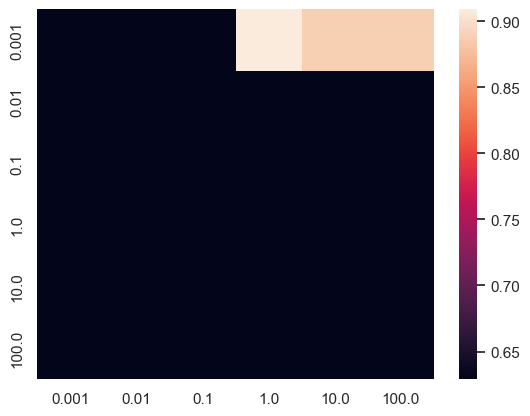

In [27]:
# インポート
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=0)

# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train,y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)

# 検証結果をscoresに格納 
scores = pd.Series(scores)

# 表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma, C):{}'.format(scores.idxmax()))

# ヒートマップを表示。縦軸にgamma、横軸にCを表示
sns.heatmap(scores.unstack())

この結果から、ベストスコアは0.91、その時のパラメータは、gammaが0.001、Cが1.0であることがわかります。

#### モジュールの関数を使ってグリッドサーチする

グリッドサーチの仕組みが分かったところで、`sklearn.model_selection`モジュールの`GridSearchCV`クラスを用いて、同等の処理をする方法を説明します。プログラムは、次に示す通りです。

モデル評価用にテストデータを分離するところまでは先程と同様です。違うのは、学習用データを`GridSearchCV`クラスの`fit`メソッドに与えるところです。こうすることで、ハイパーパラメータの組み合わせについてモデルの評価が行われるだけでなく、ベストモデルの構築まで終了します。ベストモデルを実現するパラメータの組み合わせや評価結果は、属性値から取得できます。

ここで留意したいのは、`GridSearchCV`クラスの`fit`メソッドの実行時に行われるモデルの評価は、デフォルトではk分割交差検証（厳密にはその改良版）が使われるという点です。そのため`GridSearchCV`クラスには初期化パラメータ`cv`があり、ここでは`cv=5`と設定しました。

In [31]:
# インポート
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=0)
# GridSearchCVクラスに与えるパラメータを準備
param_grid = { 'C': np.logspace(-3, 2, num=6)
               ,'gamma':np.logspace(-3, 2, num=6)}

# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=SVC(),
                  param_grid=param_grid,
                  cv=5)

# ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train,y_train)

# 表示
print('Best cross validation score:{:.3f}'.format(gs.best_score_))
print('Best parameters:{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test,y_test)))

Best cross validation score:0.925
Best parameters:{'C': 1.0, 'gamma': 0.001}
Test score:0.909


3行の出力結果を見ると、上から順に、グリッドサーチによって見つけられたモデルの評価スコア（0.93）、それを与えるハイパーパラメータの組み合わせ、テスト用データにおける評価スコア（0.909）がわかります。

グリッドサーチによって見つけられたモデルの評価スコアとは、ここでは学習用データのk分割交差検証によって得られた評価スコアを意味しますが、これとテスト用データのスコアが近いことから、過学習は生じていないと考えられます。


Scikit-learnではグリッドサーチの他にランダムサーチも用意されています。詳しくは`sklearn.model_selection`モジュールの`RandomizedSearchCV`クラスの使い方を参照してください。また、よりスマートなパラメータ探索としてSMBO（sequential model-based optimization）アプローチもあります。

>**[やってみよう]**
>
>ランダムサーチやHyperoptについて調べてみましょう。

#### <練習問題 10-2>
8章などで使用している乳がんデータに対して、決定木を使ってグリッドサーチと交差検証を実施してください。なお、決定木のパラメータは、木の深さとリーフに含まれるべき最小サンプル数、具体的には、`param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}`と設定してください。

### 10.2.3 パフォーマンスチューニング：特徴量の扱い
キーワード：バイアスとバリアンスのトレードオフ、特徴量エンジニアリング、特徴選択、特徴抽出、RFE、RFECV

本節では、モデルのパフォーマンスチューニングを考える上で重要となる**特徴量（feature）**の扱いについて、以下２つの視点に立って説明します。

- 学習不足の場合（underfitting） 
- 過学習の場合（overfitting）

※補足：なお、ここで説明していることは、「バイアスとバリアンスのトレードオフ」というタイトルなどで他の専門書で紹介されていますので、さらに詳細について知りたい方は、これらのキーワードで調べてみるのもよいでしょう。

#### 学習不足の場合

モデルが過学習はしてないが精度も低い場合、つまり、そもそもの汎化性能が低いケース（underfitting）では、一般的に、特徴量を増やせないかを検討します。具体的には、新しくデータを収集し全く新しい特徴量を追加する、特徴量の計算期間にバリエーションを持たせる、特徴量同士の比率を追加するなどの工夫を凝らすということです。その他、データを水増しする方法などもありますので、興味ある方は調べてみてください。



#### 過学習の場合

過学習が疑われる場合は、上記の学習不足の場合とは逆に、特徴量の数を減らすことを検討するのが一般的です。データ数に対して特徴量の数が多いと汎化誤差の上限が高まるためです。これを次元の呪いと言います。

特徴量の数を削ることを**次元削減（dimension reduction）**と呼びます。次元削減は2つに分類されます。1つは特徴量のサブセットを選択する**特徴選択（feature selection）**、もう1つは元の特徴空間軸を別の空間軸に変換する**特徴抽出（feature extraction）**です。12章で学んだ主成分分析（PCA）はこの特徴抽出の基本的手法として広く知られています。前者の特徴選択については、本書では詳細割愛しますが、`sklearn.model_selection`モジュールの`RFE`クラスや`RFECV`クラスで実行することができます。

どのような特徴量を生成するかを検討することを**特徴量エンジニアリング（feature engineering）**と言います。

特徴量エンジニアリングは画像、音声、自然言語、購買履歴などの構造データ、株価などの時系列データといったデータ構造別や、金融、医療、小売、マーケティング、人事、広告、製造といった業種ごとに知見が蓄積されています。現場に蓄積された知見の反映も大切にしましょう。また、次元削減についてはモデルの解釈が優先される場合は特徴選択を基本とするのがよいでしょう。

参考文献A-24も参考にしてください。

### 10.2.4 モデルの種類
キーワード：プロファイリングモデル、予測モデル、優良顧客化予測、ブランド購買離反者予測、ブランドスイッチャー予測、新規商品購買者予測、退職者予測、ハイパフォーマー予測

本節ではモデルの種類について説明します。これまではモデル構築の対象となるデータの背景、特にデータ生成期間について、特段の注意を払ってきませんでした。教師あり学習のモデル構築のためには、当然、説明変数と目的変数を準備する必要がありますが、実はこれら変数の定義期間の違いで、モデルの種類を分けることができます。たとえば、参考文献「A-25」に挙げている書籍では、モデルを**プロファイリングモデル**と**予測モデル**の2つに分けています。

プロファイリングモデルは、説明変数と目的変数とで、それぞれ同じ期間のデータで生成するモデルです。たとえば、セールスマンを昨年度の営業成績上位10%とその他の2つに分け、同期間におけるセールスマンごとの各種アクティビティを説明変数とするといったようなケースです。

一方、予測モデルは、説明変数と目的変数で期間が異なるもので、説明変数は目的変数よりも前の期間から生成されたデータを利用してモデル構築するのが普通です。たとえば、社員の入社から12ヶ月間の各種アクティビティを説明変数とし、入社後13～18ヶ月における退職有無を目的変数などとします。セールス＆マーケティングや人事領域におけるさまざまな予測モデル、優良顧客化予測、ブランド購買離反者予測、ブランドスイッチャー予測、新規商品購買者予測、退職者予測、ハイパフォーマー予測などは、基本的には予測モデル型として説明変数と目的変数が設計されます。

その他、予測モデルとしては、株価の予測などのアプローチにも使います。目的変数は未来の情報ですので、モデル構築時の説明変数にその未来情報を入れて予測しても、意味がないので注意しましょう。

同じ機械学習のアルゴリズムであっても、分析の目的が対象データの探索的理解なのか予測モデル構築なのかで、準備すべきデータの生成が変わることを理解しましょう。

## 10.3 モデルの評価指標
ゴール：混同行列とROC曲線を理解し、分類モデルの評価指標を説明できるようになる。

次は、モデルを評価する指標について考えます。モデル性能の評価はさまざまな評価指標によって定義できます。本節では、主に分類モデルの評価指標について学びます。具体的には、**適合率（precision）**、**再現率（recall）**、**F1スコア（F1-measure）**、**AUC（Area Under Curve）**について学びます。また、これらの評価指標を理解するために不可欠な**混同行列（confusion matrix）**と**ROC曲線**についても学びます。最後に、回帰アルゴリズムの評価指標について簡単に紹介します。

### 10.3.1 分類モデルの評価：混同行列と関連指標
キーワード：混同行列、正解率、適合率、再現率、調和平均、F1スコア

モデルの評価については、これまで主に正解率に主眼をおいてきましたが、モデルの性能を測る指標は正解率の他にもさまざまなものが存在します。それらの指標を理解するため、まずは**混同行列（confusion matrix）**を紹介します。

混同行列は分類モデルの評価を考える際の基本となる行列で、モデルの予測値と観測値の関係を表したものです。具体的には以下の図のように4つの区分を持ちます。予測値の正例（positive）、負例（negative）が列に、観測値の正例、負例が行に並んでいます。予測値の値が「positive」または「negative」の名称の元となり、観測値との整合性からtrueまたはfalseに分けられています。


|　 | 正例（予測）   | 負例（予測）   |
|------|------|------|
|   正例（実績）  |True positive（TP）|True positive（TP）|
|   負例（実績）  |False positive（FP）|True negative（TN）|


たとえば、予測が正例で実績でも正例ならばTrue positiveになり、予測が負例で実績でも負例ならばTrue negativeになります。この2つのケースは私たちの予測がうまくいったケースとなります。他の場合（False positiveやFalse negative）はうまくいかなかったケースになります。

これだけではわかりにくいので、次に実例をみていきます。

#### 混同行列の実例

8章、9章で扱った乳がんデータ（cancerデータ）を使って、混同行列の取得方法を説明します。まずは次のように、サポートベクターマシンとして分類モデルを構築します。この分類モデルは、乳がんであるグループか、そうでないグループかを「0」（malignant/悪性）か「1」（benign/良性）のどちらかの値で返します。なお、0と1は単なるラベルで、数字の大きさに意味はありません。

In [33]:
# インポート
from sklearn.svm import SVC

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=66)
# クラスの初期化と学習
model = SVC(gamma=0.001,C=1)
model.fit(X_train,y_train)

# 表示
print('{} train score: {:.3f}'.format(model.__class__.__name__, model.score(X_train,y_train)))
print('{} test score: {:.3f}'.format(model.__class__.__name__ , model.score(X_test,y_test)))

SVC train score: 0.979
SVC test score: 0.909



続いて混同行列を取得していきます。混合行列は、`sklearn.metrics`モジュールの`confusion_matrix`関数で取得できます。出力される数値の並びは先の図で記した通り、列に予測値（`y_pred`）、行に観測値（`y_test`）が、負例・正例の順に並びます。

In [35]:
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confution matrix:\n{}'.format(m))

Confution matrix:
[[48  5]
 [ 8 82]]


これを表にすると以下のようになります。

以下、この混同行列を使って、**正解率（accuracy）**、**適合率（precision）**、**再現率（recall）**、**F1スコア（f1 score）**ついて説明します。

#### 正解率

正解率は、全体に対して予測が当たった割合です。これまで正解率はScikit-learnの各クラスの`score`メソッドを使って計算してきましたが、混同行列を使うと以下のように計算できます。`score`メソッドの結果と同じ値になっていることを確認しましょう。

In [37]:
accuracy = (m[0, 0] + m[1, 1]) / m.sum()
print('正解率:{:.3f}'.format(accuracy))

正解率:0.909


計算式から分かる通り、目的変数を0と予測して観測値が0であった数（48）と、1と予測して観測値が1であった数（82）の合計（48+82=130）を、行列全体の数（143）で割った値になっています。全体として、どれだけ1と0を正確に予測できているかを見る指標が正解率です。

#### 適合率、再現率、F1スコア

適合率、再現率は、異なる視点からモデルの評価を可能にします。

**適合率**は、1と予測した中で実際にどれだけ1であったかの割合です。異常検知システムがアラートを出した回数のうち、実際に異常であった割合などを想像してください。上の例だと1と予測したのは5+82=87で、その中で観測値も1であった数は$82$なので、$82/87$で約$0.943$になります。

**再現率**は、実際は1のデータのうち正しく1と予測できた割合です。たとえば、病気の診断システムで再現率100%といった場合は、実際の病気データについてすべて病気であると予測できている状態です。上の例だと1と観測したのは$8+82=90$で、その中での予測値は$82$なので、$82/90$で約$0.911$になります。

**F1スコア**は適合率と再現率の調和平均です。適合率を優先すべきか、再現率を優先すべきかが決まっていない時点で、モデルを総合的に評価する場合などに使われます。なお、調和平均は$2/(1/0.943+1/0.911)$で、約$0.927$になります。なお、調和平均については、統計学の専門書のはじめの方に説明があると思いますので、詳細を知りたい方は調べてみてください。

以上の3指標の算出を混同行列の要素を使って表現すると以下のようになります。

In [39]:
# 適合率の計算
precision = (m[1,1])/m[:, 1].sum()

# 再現率の計算
recall = (m[1,1])/m[1, :].sum()

# F1スコアの計算
f1 = 2 * (precision * recall)/(precision + recall)

print('適合率:{:.3f}'.format(precision))
print('再現率:{:.3f}'.format(recall))
print('F1値:{:.3f}'.format(f1))

適合率:0.943
再現率:0.911
F1値:0.927


これらの値は、Scikit-learnの関数を使って求めることもでき、そのほうが簡単です。上記の計算は概念を理解してもらうために1つ1つ計算しましたが、慣れたら以下のようにコーディングしてください。上記と数値が一致していることを確認してください。

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('適合率:{:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred)))

適合率:0.943
再現率:0.911
F1値:0.927


#### <練習問題 10-3>
<練習問題 10-2>で使用した乳がんデータに対して、サポートベクターマシン以外のモデル（ロジスティック回帰分析など）を構築し、混同行列を作ってください。また、テストデータにおける正解率、適合率、再現率、F1値の値をScikit-learnの関数を使って取得して下さい。

### 10.3.2 分類モデルの評価：ROC曲線とAUC
キーワード：ROC曲線、AUC

前節で学んだ混同行列は、予測結果が正例と負例にラベル付けされていることを前提としますが、モデルの評価時点において、予測ラベルを分ける閾値が事前に決定できるとは限りません。つまり、分類モデルが出力する（予測ラベルではなく）予測確率の値そのものと観測値（1か0か）との関係から、モデルの性能を評価したい場合があり、そのような場合、本節で学ぶ**ROC曲線**と**AUC**が役に立ちます。

#### ROC曲線

ROC曲線は、縦軸に**真陽性率（tpr: true positive rate）**、横軸に**偽陽性率（fpr: false positive rate）**の値をプロットした曲線です。


真陽性率とは、実際の正例のうちどれだけを正例と予測できたかの割合（再現率と同じ）、偽陽性率とは、実際は負例のうち正例と予測されてしまった割合です。予測確率を予測ラベルに変換する際の閾値を0.0と1.0の間で徐々に変化させ、真陽性率と偽陽性率の関係をプロットすることでROC曲線を描きます。

（※図は書籍を参照してください※）

##### 予測確率を閾値で分けて予測ラベルを作る
閾値を変化させてROC曲線を描くとはどういうことか理解するため、乳がんデータを使って確認してみましょう。次のプログラムは、ロジスティック回帰モデルを扱う`LogisticRegression`クラスの`predict_proba`メソッドを使って、がんが悪性（malignant：0）か良性（benign：1）かの予測確率を取得するものです。`predict_proba`メソッドの出力は0か1かのラベルではなく、各クラスに分類される予測確率の配列です。ここでは、悪性（malignant：0）を正例、良性（benign：1）を負例として考えます。

In [43]:
# インポート
from sklearn.linear_model import LogisticRegression

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=66)
# LogisticRegressionクラスの初期化と学習
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# テスト用データの予測確率を計算
results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)

# 先頭の5行を表示
results.head()

C:\Users\TAKUMANISHIZUKA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,malignant,benign
0,0.004602,0.995398
1,0.000425,0.999575
2,0.027021,0.972979
3,0.007153,0.992847
4,0.003230,0.996770


予測確率から予測ラベル分け（「malignant：0」か「benign：1」）するには、単純に50%（0.5）を閾値として、それを超えるかどうかで判断できそうですが、実際はモデルの使用目的、正例の自然発生率などを考慮して閾値を設定します。

閾値を変えれば、当然、良性（正例）と予測されるサンプルの数も変わるので、正解率、適合率、再現率も変わります。たとえば、以下のように、閾値を0.4、0.3、0.15、0.05と4パターンの場合を考えてみます。現在、正例である良性（benign）クラスの予測確率に注目します。以下では、良性の予測確率が閾値を超えていたら1、そうでなければ0となるフラグ変数を作成しています。

In [45]:
# 良性（benign）クラスの予測確率が0.4、0.3、0.15、0.05以上なら、それぞれの列に1を設定する
for threshold in [0.4, 0.3, 0.15, 0.05]:
    results[f'flag_{threshold}'] = results['benign'].map(lambda x: 1 if x > threshold else 0)

# 先頭の10行を表示
results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.004602,0.995398,1,1,1,1
1,0.000425,0.999575,1,1,1,1
2,0.027021,0.972979,1,1,1,1
3,0.007153,0.992847,1,1,1,1
4,0.003230,0.996770,1,1,1,1
5,0.006996,0.993004,1,1,1,1
6,0.006811,0.993189,1,1,1,1
7,0.003046,0.996954,1,1,1,1
8,0.887046,0.112954,0,0,0,1
9,0.865113,0.134887,0,0,0,1


上記の9行目や10行目（インデックス8と9の行）を見ると、予測確率とフラグの関係が理解しやすいと思います。このように、予測確率と閾値から予測フラグを立てることで、観測値との混同行列が作成可能となり、偽陽性率と真陽性率の値を（閾値ごとに）算出できます。

##### ROC曲線をプロットする

上記閾値の4パターンだけではROC曲線のごく一部しか表現できないため、以下では、閾値を0.01から0.99の間で50通りとして、偽陽性率と真陽性率をプロットしてみます。labelsで取得している結果が、上記で確認した予測フラグです。

<Axes: xlabel='false positive rate', ylabel='true positive rate'>

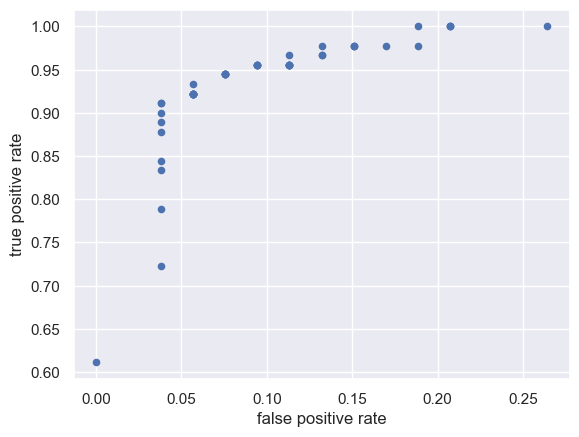

In [47]:
# 閾値を0.01から0.99の間で50通りとして、偽陽性率と真陽性率を計算
rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
    labels = results['benign'].map(lambda x: 1 if x > threshold else 0)
    m = confusion_matrix(y_test, labels)
    rates[threshold] = {'false positive rate': m[0,1] / m[0, :].sum(),
                         'true positive rate': m[1,1] / m[1, :].sum()}
    
# 横軸をfalse positive rate、縦軸をtrue positive rateとしてプロット
pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

#### ROC曲線とAUC

上ではROC曲線を理解するために、直接プロットしましたが、Scikit-learnのクラスを使っても描画できます。具体的には、`sklearn.metrics`モジュールの`roc_curve`関数を使います。

ここでは同じく乳がんデータを使ってサポートベクターマシンのモデルを構築し、予想確率（`y_pred`）を得ます。

In [49]:
# インポート
from sklearn import svm
from sklearn.metrics import roc_curve, auc

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.5, random_state=66)

# SVCによる予測確率の取得
model = svm.SVC(kernel='linear', probability=True, random_state=0)
model.fit(X_train, y_train)

# 予測確率を取得
y_pred = model.predict_proba(X_test)[:,1]

予測確率（`y_pred`）を得たら観測値（`y_test`）と共に`sklearn.metrics`モジュールの`roc_curve`関数に与えます。すると、偽陽性率（fprとする）と真陽性率（tprとする）の各配列を戻り値として取得できるので、それを描画します。実際の計算と描画は次の段落で行います。


##### AUCの計算

ではROC曲線を計算し、ここではさらにAUCも計算してみます。AUCの値は`sklearn.metrics`モジュールの`auc`関数にfprとtprをこの順に与えると取得できます。

ROC曲線は、AUC計算で使ったfprとtprの各配列を使って描画します。赤い実線の下の面積がAUCがそれに相当します。ここでは予測スコアがランダムな場合のROC曲線も合わせて描画しています。黒い点線がそれに相当します。


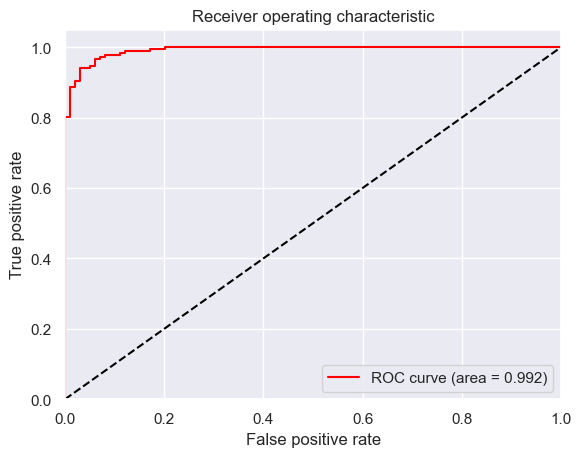

In [51]:
# 偽陽性率と真陽性率の算出
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUCの算出
auc = auc(fpr, tpr)

# ROC曲線の描画
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

#### 理想的なROC曲線とAUC

ROC曲線の形状は、閾値を（1.0を超える値から）徐々に小さくしたとき、原点から真陽性率だけが上昇するのが理想です。つまり、原点から座標(0,1)に向けて垂直移動し、その後、座標 (1,1)に水平移動するものが最適理想曲線となります。

逆に、予測確率がランダムな場合、真陽性率も偽陽性率も等しく上昇することが期待されるので、ROC曲線は原点から傾き1の直線となります。機械学習によって構築されたモデルは、通常、ランダムな場合と最適理想曲線の間にプロットされ、より膨らみを持つことが期待されます。

AUCはROC曲線の形状に基づくモデルの評価指標のことで、ROC曲線と横軸で囲まれる面積の値です。つまり、最適理想曲線では1.0、予測確率がランダムな場合は0.5となります。

上記より、本ケースのAUCは0.992であることから、ランダムと比べると、かなり高い性能を有したモデルであると確認できます。ROC曲線やAUCについては参考文献「A-26」や「A-27」の『Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies (MIT Press) 』などが参考になりますので、余裕がある方は読んでみてください。

混同行列の作成、ROC曲線の形状比較、そして適合率、再現率、F1スコア、AUCの大小比較は、モデル選択をする際の基礎的な根拠となります。ただし、あくまでもそれは選択候補のモデル間に、相対的な順番を与えるものに過ぎませんから、モデルを活用したときに得られるであろうビジネス成果との関係を理解することなく、単なる数値追求だけとなることは避けるよう留意しましょう。

#### 不均衡データ下におけるAUCの活用

最後に、AUC活用の意義を補足します。10.3.2の冒頭では、閾値が不明瞭な段階では混同行列が一意に定まらない点を指摘しました。

AUCを活用すると、不均衡データ（imbalanced data）にも対応できます。たとえば、あるスーパーで商品Aを買う人が全体の5%だったとします。予測モデルを構築し、予測確率上位5人が商品Aを買うと予測フラグ立てしたとしましょう。このとき、買うと予測された5人（フラグ1が立っている人）のいずれも正解ではなかった（未購買であった）とします。混同行列に当てはめると以下のようなケースです。全体を100人としています。

|　| 予測(0)|予測(1)|
|:------|------:|------:|
| 観測(0) |90|5|
| 観測(1) |5|0|

この場合、適合率は0%ですが、正解率は90％となります。もしモデルの精度を正解率だけでみると、90%の正解率は一見良さそうなモデルに見えてしまいます。しかし、予測したい人は買う人ですから、適合率0%のモデルは、意味のあるモデル構築の結果とは言えません。

この例のように「買う人が100人中5人」といった、それぞれのクラスのサンプル数に偏りがある状況下では、正解率は好ましい指標とは言えません。その点、AUCであれば、各クラスのサンプル数の偏りは、fpr（偽陽性率）とtpr（真陽性率）の分母として使われるため吸収されます。つまり、AUCは不均衡データ下におけるモデルの評価時にも耐えられる指標と言えます。

#### <練習問題 10-4>
8章、9章の練習問題で使用したアヤメのデータ（iris）に対して、目的変数をiris.targetとしたSVCを用いた多クラス分類のモデルを作り、そのROC曲線とAUCを計算してください。多クラス分類のモデルを作るには、`sklearn.multiclass`モジュールの`OneVsRestClassifier`クラスを用いてください。

### 10.3.3 回帰モデルの評価指標
キーワード：MSE、MAE、MedAE、R2スコア

前節までは分類モデルの評価指標について学びましたが、本節では回帰モデルの評価指標について紹介します。

回帰モデルは訓練データの目的変数が株価や物件価格などの数値であるため、比較的直感的な指標でモデルを評価することができます。主な評価指標は、以下の通りです。

#### 平均二乗誤差（Mean Squared Error：MSE）
予測値と正解の差（残差）の二乗をサンプルごとに足し上げたものを残差平方和（sum of squared errors：SSE）と言います。そしてそれを最後にサンプル数で割ることで得られるものが平均二乗誤差MSEです。MSEはシンプルでわかりやすい指標のため、さまざまなアルゴリズムの性能評価に使用されます。

#### 平均絶対誤差（Mean Absolute Error：MAE)
残差の絶対値をサンプルごとに足し上げ、最後にサンプル数で割ることで得られるのが平均絶対誤差MAEです。MSEと比べ残差が二乗されていない分、（予測の）外れ値の影響を受けにくいという特徴があります。

#### Median Absolute Error（MedAE）
残差の絶対値の中央値がMedAEです。MAEよりも更に外れ値に堅牢（ロバスト）な評価指標です。

#### 決定係数（R2）
決定係数（$R^{2}$）は、検証データの平均値で予測をした場合の残差平方和$SST$（sum of squared total）と、モデルの残差平方和$SSE$（sum of squared errors）の比率で、$R^{2}=1-SSE/SST$と定義されます。平均値予測という最もナイーブな予測に対して二乗誤差をどれだけ削れたかを示す指標で、誤差をすべてなくせば1.0、平均値予測と同等で0.0になります。$R^{2}$の範囲は、通常0〜１の値を取りますが、負になる可能性があることに留意しましょう。

#### 回帰モデル評価の実例

それでは回帰用のサンプルデータセットであるHousingデータセットを使って、回帰モデルの評価指標の取得方法を見ていきましょう。

Housingデータセットは、ボストン近郊地域に関するエリア属性（犯罪発生率や低所得者の割合など）と住宅価格の中央値（MEDV）を変数として持っています。データの先頭5行を表示した結果は、次の通りです。

In [17]:
# インポート
# from sklearn.datasets import load_boston

# Housingデータセットを読み込み
# boston = load_boston()

# DataFrameにデータを格納
# X = pd.DataFrame(boston.data, columns=boston.feature_names)

# 住宅価格の中央値（MEDV）のデータを用意
#y = pd.Series(boston.target, name='MEDV')

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# 特徴量とターゲットに分割
X = data.drop('medv', axis=1)  # 住宅価格の中央値（medv）を除外
y = data['medv']              # 住宅価格の中央値（medv）

# Xとyを結合して先頭の5行を表示
X.join(y).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


以下では、この`MEDVを目的変数`として「重回帰モデル（LinearRegression）」「リッジ回帰モデル（Ridge）」「決定木（回帰木）モデル（DecisionTreeRegressor）」「線形サポートベクター回帰（LinearSVR）」でモデルを構築し、それぞれのモデルに対してMAE、MSE、MedAE、R2の各評価値を算出するプログラムです。評価にはホールドアウト法を採用しました。

In [21]:
# インポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# モデルの設定
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'LinearSVR': LinearSVR(random_state=0)
}

# 評価値の計算
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(y_test, model.predict(X_test))
    scores[(model_name, 'MAE')] = mean_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'MedAE')] = median_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'R2')] = r2_score(y_test, model.predict(X_test))

#表示
pd.Series(scores).unstack()

C:\Users\TAKUMANISHIZUKA\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,MAE,MSE,MedAE,R2
DecisionTreeRegressor,3.064822,24.590435,1.900000,0.675653
LinearRegression,3.627793,25.301662,2.903830,0.666272
LinearSVR,3.275385,26.799616,2.092362,0.646514
Ridge,3.618201,25.282890,2.930524,0.666520


上記の結果より、決定木モデルは、R2が一番高く、MAEやMSEも一番低くなっており、良いモデルのようです。

なお上記では、ホールドアウト法において評価指標を取得していますが、もちろん交差検証においても各評価指標を取得することができます。k分割交差検証の場合は、それを行うための`cross_val_score`関数にある引数`scoring`を設定することで戻り値を変更できます。詳しくはScikit-learnの公式ドキュメントを確認してください。

## 10.4 アンサンブル学習
ゴール：アンサンブル学習の概要を理解し、代表的手法（ランダムフォレスト、勾配ブースティング）を使えるようになる

8章では、教師あり学習のさまざまなアルゴリズム（決定木、ロジスティック回帰、サポートベクターマシンなど）を個別に学びましたが、ここでは複数のモデルを組み合わせて予測する**アンサンブル学習（ensemble learning）**について学びます。具体的には**バギング（bagging）**、**ブースティング（boosting）**について学びます。またバギングとブースティングの中でも代表的なアルゴリズムとして**ランダムフォレスト（Random Forest）**と**勾配ブースティング（Gradient Boosting）**について学びます。

個別のアルゴリズムのチューニングでは突破できない性能を、アンサンブル学習では実現できる可能性があります。精度追求が重要な局面においてアンサンブル学習は重要な1つのオプションとなり得ます。アンサンブル学習のたとえとして、「3人寄れば文殊の知恵」ということがよく言われ、そのイメージです。

### 10.4.1 バギング
キーワード：バギング、復元抽出、ブートストラップ

**バギング（bootstrap aggregating: bagging）**は、まず元の学習データ（$n$行）からランダムに$n$行のデータを復元抽出（重複を許して抽出）し、新しい学習データを作成するということを繰り返します（ブートストラップと言います）。

そして、その取り出したデータそれぞれに対して、一つ一つモデルを作成し、モデルの結果を集約して予測をします。結果の集約は分類であれば多数決、回帰であれば平均値を取るなどします。元の学習データと少しずつ異なる学習データに対してモデルが構築されるので、モデルが過学習傾向にある時、バギングによって汎化性能を向上させられる可能性があります。以下の図がイメージしやすいです。なお、学習器とは、今まで扱ってきたk-NNなどになります。

（※図は書籍を参照してください※）

#### バギングの実例

以下がバギングの実行例になります。乳がんのデータを使ってk-NNモデルでバギングしてモデルを構築する例です。`sklearn.ensemble`モジュールの`BaggingClassifier`クラスを使っています。なお、回帰用のクラスもあるので、そちらについてはScikit-learnの公式ドキュメントを確認ください。

In [25]:
# インポート
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

# k-NNモデルとそのバギングの設定
models = {
    'kNN': KNeighborsClassifier(),
    'bagging': BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0) 
}

# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

# 結果を表示
pd.Series(scores).unstack()

,test_score,train_score
bagging,0.937063,0.950704
kNN,0.923077,0.948357


上記では引数`n_estimators`を100として、k-NNのモデルを100個でバギングしています。訓練スコア（`train_score`）の値はほぼ同等ですが、テストスコア（`test_score`）の値が上昇していることを確認できます。

`BaggingClassifier`クラスは他に`max_samples`（デフォルトは1.0）、`max_features`（デフォルトは1.0）というパラメータを持ちます。前者はブートストラップをする時に元のデータの何割抽出するかを指定します。0.5とすれば元の訓練データが100件あれば50件の標本が抽出されます。後者は説明変数をどの程度サンプリングするかの指定で、0.5とすれば全変数のうちの半分でモデルが学習されます。

元のモデルが過学習しているときは、手元のデータをそのまますべて使わないようにし、説明変数に（標本ごとに）多様性を与えるようにすることで、有効な過学習対策になる可能性があることを覚えておきましょう。

>**[やってみよう]**
>
>BaggingClassifierのパラメータについて調べてみましょう。

#### <練習問題 10-5>
アヤメのデータセットを対象にバギングを使って、目的変数（`iris.target`）を予測するモデルを構築し検証しましょう。また、パラメータとして何を調整しますか。調べて実行してみましょう。

### 10.4.2 ブースティング
キーワード：ブースティング、アダブースト

前節のバギングでは、ブートストラップによって抽出された複数の標本に対して（個別に）複数のモデルが構築されます。一方、本節で学ぶ**ブースティング（boosting）**は、学習データもモデルも逐次的に生成・構築されていきます。

もう少し詳細に述べると、まずオリジナルの学習データに対し最初のモデルが構築されます。この時点で予測と正解を比較して合致しているサンプル、外しているサンプルを把握します。そして外したサンプルが、次のモデル構築の段階で重視されるように新しい学習データが生成されます。このようなステップが繰り返される過程でモデルも逐次的に複数構築されるのです。最後に、それらの予測値を組み合わせることで汎化性能の向上が図られます。なお、ブースティングは学習不足（underfitting）傾向の時に効果的な手法と言われています。

下記に、参照URLを載せます。順番に（逐次的に）モデルを構築しているイメージです。

（※図は書籍を参照してください※）

#### ブースティングの実例

ブースティングの実例を示します。決定木モデル（DecisionTreeRegressor）をブースティングするものです。ブースティングには、`sklearn.ensemble`モジュールの`AdaBoostRegressor`クラスの使います。ブースティングのアルゴリズムには、他にLPBoost、BrownBoost、LogitBoostなどがありますので、興味のある方は「ブースティング」やこれらのキーワードで調べてみてください。

In [29]:
# インポート
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# 特徴量とターゲットに分割
X = data.drop('medv', axis=1)  # 住宅価格の中央値（medv）を除外
y = data['medv']              # 住宅価格の中央値（medv）

# Xとyを結合して先頭の5行を表示
X.join(y).head()

# housingデータを読み込み
# boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=66)

# 決定木とAdaBoostRegressorのパラメータ設定
models = {
    'tree': DecisionTreeRegressor(random_state=0),
    'AdaBoost': AdaBoostRegressor(DecisionTreeRegressor(), random_state=0) 
}

# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

# 結果を表示
pd.Series(scores).unstack()

,test_score,train_score
AdaBoost,0.922829,0.999522
tree,0.721430,1.000000


決定木を単体で使う場合のテストスコアは約0.687止まりですが、AdaBoostRegressorクラスを使ったアンサンブル学習に切り替えるとテストスコアが約0.923と大きく向上していることがわかります。このようにアンサンブル学習は精度追求局面においては大変強力なオプションになり得ることを覚えておきましょう。

ただし今回のアダブーストの結果は、やや過学習傾向にある点（学習データとテストデータとのスコアにやや乖離がある）は留意すべきでしょう。

>**[やってみよう]**
>
>AdaBoostRegressorのパラメータについて調べてみましょう。上の過学習を防ぐために、どうやってパラメータを設定しますか。

#### <練習問題 10-6>
アヤメのデータセットを対象にブースティング（`AdaBoostRegressor`クラス）を使って、目的変数（`iris.target`）を予測するモデルを構築し検証しましょう。また、パラメータとして何を調整しますか。調べて実行してみましょう。

### 10.4.3 ランダムフォレスト、勾配ブースティング
キーワード：ランダムフォレスト、勾配ブースティング、変数の重要度、Partial Dependence Plots

本節では、バギングとブースティングの中でも代表的なものである**ランダムフォレスト（Random Forest）**と**勾配ブースティング（Gradient Boosting）**の使い方を紹介します。いずれも、ベースとしているアルゴリズムは決定木です。

アンサンブル学習を手軽に実行する場合、上記のいずれかのアルゴリズムが採用されるケースが多いです。機械学習の初学者であれば、考え方を10.3.1と10.3.2で理解し、実際のモデル構築はこれらアルゴリズムで行うというスタートが良いと思われます。

またモデル結果の解釈性が優先される場合は、ロジスティック回帰や決定木など、よりシンプルなモデルを採用した方が良い局面もあることは留意しておきましょう。

#### ランダムフォレストと勾配ブースティングの実例

実際にランダムフォレストと勾配ブースティングを使ったプログラム例を見てみましょう。データはHousingデータを使いました。

In [33]:
# インポート
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Housingデータを読み込み
# boston = load_boston()

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# 特徴量とターゲットに分割
X = data.drop('medv', axis=1)  # 住宅価格の中央値（medv）を除外
y = data['medv']              # 住宅価格の中央値（medv）

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=66)

# ランダムフォレストと勾配ブースティングのパラメータ設定
models = {
    'RandomForest': RandomForestRegressor(random_state=0),
    'GradientBoost': GradientBoostingRegressor(random_state=0) 
}

# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

# 結果を表示
pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.926076,0.977138
RandomForest,0.894637,0.979374


#### 変数の重要度

上記の結果から、Housingデータに対しては、勾配ブースティングの性能が高そうであることがわかります。

先に、アンサンブル学習のモデルの解釈性（の低さ）について言及しましたが、モデル構築の中でどの変数が重要な役割を担ったかを定量的に把握することができます。具体的には各オブジェクトが持つ`feature_importances_`属性にアクセスすることで、**変数の重要度（feature importance）**を取得することができます。実際に取得すると、次のようになります。

<Axes: >

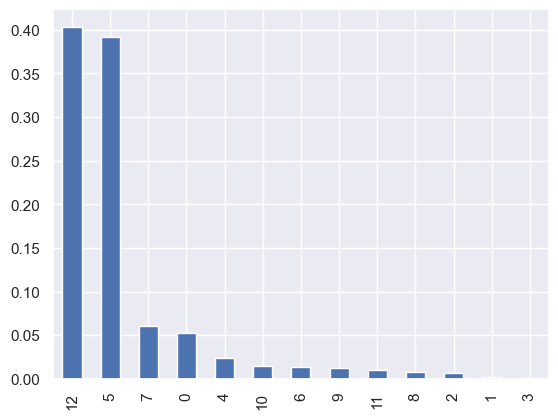

In [41]:
# feature_importmnces属性を取得
s = pd.Series(models['RandomForest'].feature_importances_)

# 取得した値を降順に表示
s.sort_values(ascending=False).plot.bar(color='C0')

変数の重要度は、11章で登場した情報利得をベースに計算されています。そのため変数の重要度を見ても回帰係数のような解釈は困難です。ただし、相対的な大小関係から、どの変数がモデル構築において重要であったかは示してくれますし、この変数が効果的であろうという直感と整合的な結果になることも少なくありませんから、確認する癖を付けておくことは大切です。

また、重要変数に絞り、説明変数と目的変数の関係を深堀りすれば、それがなぜモデル構築に役立ったか考察することもできます。

本書では割愛しますが、Partial Dependence Plots（PDP）という、説明変数の大小と予測値の大小関係性を図解してくれる関数も存在します。Scikit-learnでは`plot_partial_dependence`関数が用意されていますので、更に理解を深めたい方は公式ドキュメント（参考URL「B-21」）を参照ください。

### 10.4.4　今後の学習に向けて
最後に、今後の学習のための参考書を紹介します。具体的な書籍情報は「A-27」にまとめています。後半は少し難易度がある機械学習の本で、より理論的な知識や実装を身につけたい方にオススメです。ある程度数学的なバックグランドも必要ですが、本書を読み終えた後であれば大丈夫だと思います。

「A-27」はどちらかというと比較的数式が多く、あまりビジネス的な視点では多くは書かれていません。「A-28」の参考文献は、ビジネスでデータサイエンスを活かす視点で記載されていますので、ぜひ参考にしてください。

#### <練習問題 10-7>
アヤメのデータを対象にランダムフォレストと勾配ブースティングを使って、目的変数（`iris.target`）を予測するモデルを構築し検証しましょう。また、パラメータとして何を調整しますか。調べて実行してみましょう。

## 10.5 総合問題

### ■総合問題10-1 教師あり学習の用語（2）

以下の用語について、それぞれの役割やその意味について述べてください。
- 過学習
- ホールドアウト法
- 交差検証法
- グリッドサーチ
- 特徴量
- 特徴選択
- 特徴抽出
- 混同行列
- ROC曲線
- 適合率
- 再現率
- 正解率
- F1スコア
- 真陽性率（True Positive Rate）
- 偽陽性率（False Positive Rate）
- AUC
- ブートストラップ法
- アンサンブル学習
- バギング
- ブースティング
- ランダムフォレスト

### ■総合問題10-2 交差検証

乳がんデータセットを使って、予測モデル（ロジスティック回帰、SVM、決定木、k-NN、ランダムフォレスト、勾配ブースティング）を構築し交差検証（5分割）により、どのモデルが一番良いか確認してください。